## Feature selection with correlation

* In this step we will be removing highly correlated features

In [4]:
# Import libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [10]:
# Convert Data into DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Define Independant and Dependant feature

In [12]:
X = df.drop("MEDV", axis=1)
y = df.MEDV

In [13]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=45 )

In [16]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Checking Correlation

In [17]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.191963,0.394719,-0.057650,0.398903,-0.204529,0.347129,-0.371188,0.612999,0.570024,0.287032,-0.397138,0.423573
ZN,-0.191963,1.000000,-0.526827,-0.036450,-0.509969,0.313954,-0.563199,0.662214,-0.305215,-0.303308,-0.394036,0.174711,-0.410474
INDUS,0.394719,-0.526827,1.000000,0.079312,0.760303,-0.391890,0.648801,-0.705431,0.586573,0.709339,0.348175,-0.368857,0.613608
CHAS,-0.057650,-0.036450,0.079312,1.000000,0.105786,0.097595,0.091455,-0.112383,-0.019946,-0.040974,-0.138952,0.043256,-0.042619
NOX,0.398903,-0.509969,0.760303,0.105786,1.000000,-0.289601,0.735557,-0.768432,0.589095,0.649388,0.151283,-0.400255,0.592244
RM,-0.204529,0.313954,-0.391890,0.097595,-0.289601,1.000000,-0.250080,0.209714,-0.184091,-0.269697,-0.310838,0.127806,-0.606946
AGE,0.347129,-0.563199,0.648801,0.091455,0.735557,-0.250080,1.000000,-0.756296,0.462488,0.511958,0.256602,-0.289318,0.630594
DIS,-0.371188,0.662214,-0.705431,-0.112383,-0.768432,0.209714,-0.756296,1.000000,-0.487606,-0.533269,-0.227947,0.298531,-0.504970
RAD,0.612999,-0.305215,0.586573,-0.019946,0.589095,-0.184091,0.462488,-0.487606,1.000000,0.908751,0.470147,-0.441234,0.475620
TAX,0.570024,-0.303308,0.709339,-0.040974,0.649388,-0.269697,0.511958,-0.533269,0.908751,1.000000,0.447319,-0.441572,0.539706


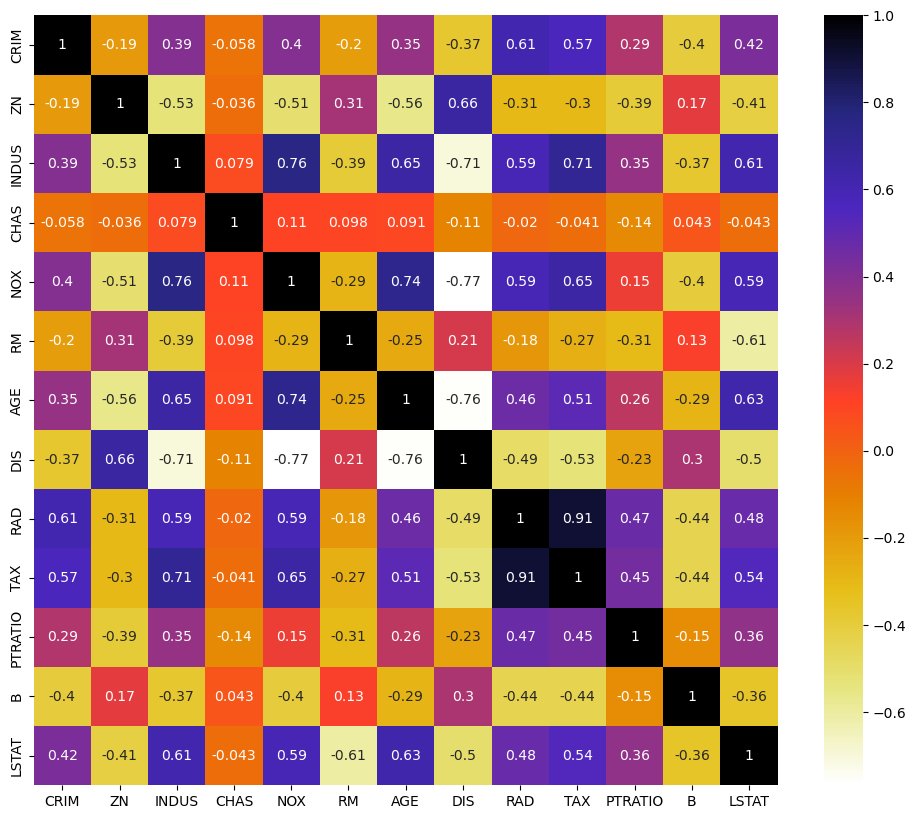

In [18]:
# Lets plot heatmap for better understanding
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
# Create a function to remove correlated feature, it will be remove first feature that is correlated with anything other feature
def highly_correlated(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matix = dataset.corr()
    for i in range(len(corr_matix.columns)):
        for j in range(i):
            if abs(corr_matix.iloc[i,j]) > threshold: # We are intrested in absoulte coeff value
                col_name = corr_matix.columns[i]
                col_corr.add(col_name)
    return col_corr
                

In [27]:
# Give the data and set the threshold according to need
corr_features = highly_correlated(X_train,0.7)
print(corr_features)
len(highly_correlated(X_train,0.7))

{'NOX', 'DIS', 'TAX', 'AGE'}


4

In [28]:
# Drop highly correlated feature from both training and testing data
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
48,0.25387,0.0,6.91,0.0,5.399,3.0,17.9,396.90,30.81
64,0.01951,17.5,1.38,0.0,7.104,3.0,18.6,393.24,8.05
473,4.64689,0.0,18.10,0.0,6.980,24.0,20.2,374.68,11.66
485,3.67367,0.0,18.10,0.0,6.312,24.0,20.2,388.62,10.58
228,0.29819,0.0,6.20,0.0,7.686,8.0,17.4,377.51,3.92
...,...,...,...,...,...,...,...,...,...
411,14.05070,0.0,18.10,0.0,6.657,24.0,20.2,35.05,21.22
300,0.04417,70.0,2.24,0.0,6.871,5.0,14.8,390.86,6.07
69,0.12816,12.5,6.07,0.0,5.885,4.0,18.9,396.90,8.79
73,0.19539,0.0,10.81,0.0,6.245,4.0,19.2,377.17,7.54


# Lets try on big dataset

In [40]:
data = pd.read_csv("train.csv",nrows=1000)
print("Shape of data:",data.shape)
data.head()

Shape of data: (1000, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,117310.979016,0


In [41]:
# Define Independant and dependant features
X = data.iloc[:,:-1]
y = data['TARGET']

In [42]:
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,117310.979016


In [43]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [44]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=45)
print("Shape of Training Data:", X_train.shape,"Shape of Testing Data:",X_test.shape,sep='\n')

Shape of Training Data:
(700, 370)
Shape of Testing Data:
(300, 370)


## Remove highly correlated features

In [45]:
data.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.031401,0.003751,0.043438,0.016661,-0.007528,0.034639,0.006839,NaN,-0.051523,...,NaN,NaN,NaN,NaN,-0.030061,-0.021319,-0.033085,-0.033045,-0.009952,-0.000050
var3,-0.031401,1.000000,0.001504,0.002343,0.006144,0.006053,0.002041,0.002381,NaN,0.001000,...,NaN,NaN,NaN,NaN,0.001331,0.001000,0.001409,0.001402,0.000386,0.006451
var15,0.003751,0.001504,1.000000,0.041026,0.120504,0.118211,0.060516,0.049230,NaN,0.014712,...,NaN,NaN,NaN,NaN,0.009993,0.000865,0.017163,0.017742,-0.028170,0.124697
imp_ent_var16_ult1,0.043438,0.002343,0.041026,1.000000,0.049376,0.024802,-0.004727,-0.005489,NaN,-0.002345,...,NaN,NaN,NaN,NaN,-0.003122,-0.002345,-0.003305,-0.003289,-0.017578,-0.015083
imp_op_var39_comer_ult1,0.016661,0.006144,0.120504,0.049376,1.000000,0.907552,0.405278,0.340919,NaN,0.146700,...,NaN,NaN,NaN,NaN,-0.008072,-0.006064,-0.008547,-0.008503,-0.011730,0.016432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.021319,0.001000,0.000865,-0.002345,-0.006064,0.008349,-0.002017,-0.002343,NaN,-0.001001,...,NaN,NaN,NaN,NaN,0.904872,1.000000,0.640920,0.605561,-0.000388,-0.006458
saldo_medio_var44_ult1,-0.033085,0.001409,0.017163,-0.003305,-0.008547,0.000785,-0.002843,-0.003302,NaN,-0.001411,...,NaN,NaN,NaN,NaN,0.906708,0.640920,1.000000,0.998978,-0.000547,-0.009102
saldo_medio_var44_ult3,-0.033045,0.001402,0.017742,-0.003289,-0.008503,0.000322,-0.002829,-0.003285,NaN,-0.001404,...,NaN,NaN,NaN,NaN,0.886713,0.605561,0.998978,1.000000,-0.000544,-0.009055
var38,-0.009952,0.000386,-0.028170,-0.017578,-0.011730,-0.013105,-0.002068,-0.002602,NaN,-0.006912,...,NaN,NaN,NaN,NaN,-0.000516,-0.000388,-0.000547,-0.000544,1.000000,-0.031998


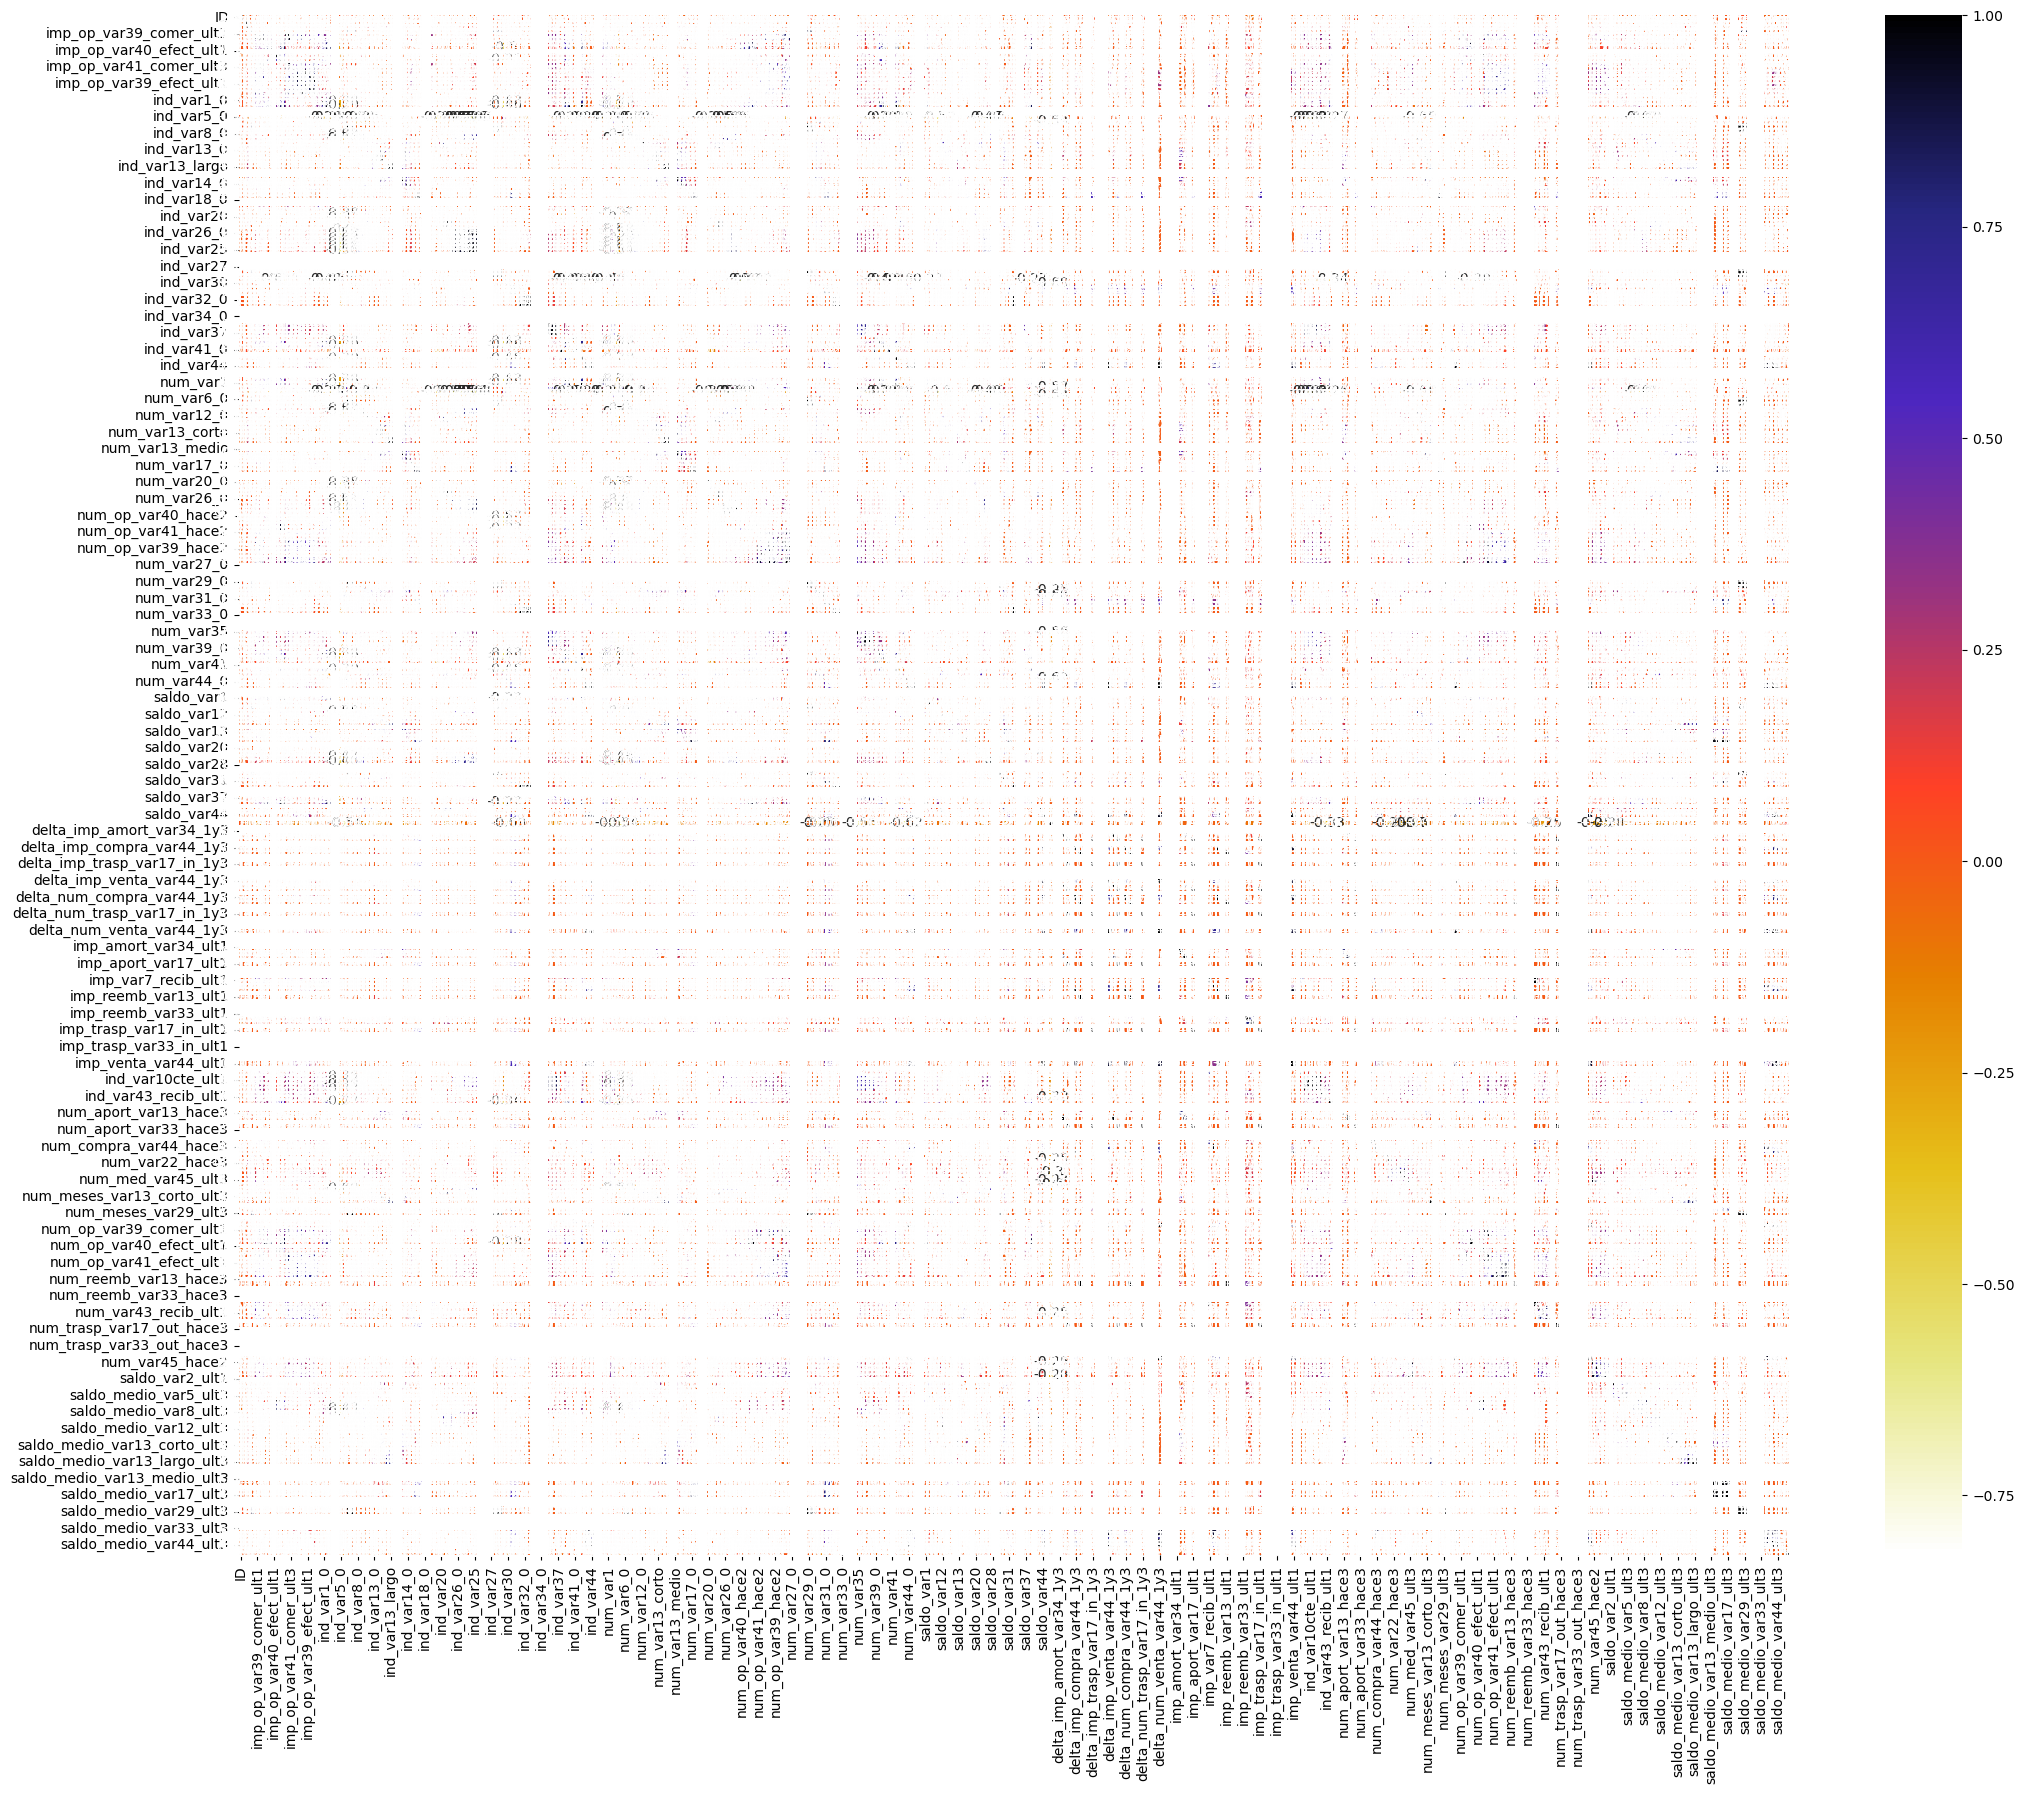

In [47]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [48]:
remove = highly_correlated(X_train,0.9)
print(len(remove), )

{'delta_imp_aport_var17_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_ult1',
 'imp_compra_var44_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_trasp_var17_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var6_0',
 'ind_var7_recib_ult1',
 'ind_var9_ct